In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import EMA
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'anet'
stock = Stock(ticker, config='../config.toml')
stock.load_data()
stock.snip_dates('2019-01-01', '2019-12-31')

In [3]:
%%time
# Calculate EMA signals
ema_signal = EMA(stock)

CPU times: user 12.4 ms, sys: 542 µs, total: 13 ms
Wall time: 12.6 ms


In [4]:
%%time
# Run simulation
sim = Simulation(ema_signal.stock_obj)
sim.paper_trade()

{'cash-usd': 9025.572, 'anet': 14}
{'cash-usd': 8029.302, 'anet': 29}
{'cash-usd': 8029.302, 'anet': 0}
{'cash-usd': 8976.247, 'anet': 16}
{'cash-usd': 8032.967, 'anet': 32}
{'cash-usd': 8032.967, 'anet': 0}
{'cash-usd': 9037.037, 'anet': 17}
{'cash-usd': 8065.6230000000005, 'anet': 34}
{'cash-usd': 8065.6230000000005, 'anet': 0}
{'cash-usd': 9205.431, 'anet': 20}
{'cash-usd': 8205.663, 'anet': 41}
CPU times: user 2.55 s, sys: 87.9 ms, total: 2.64 s
Wall time: 2.64 s


In [5]:
doberplot = DoberPlot(stock)

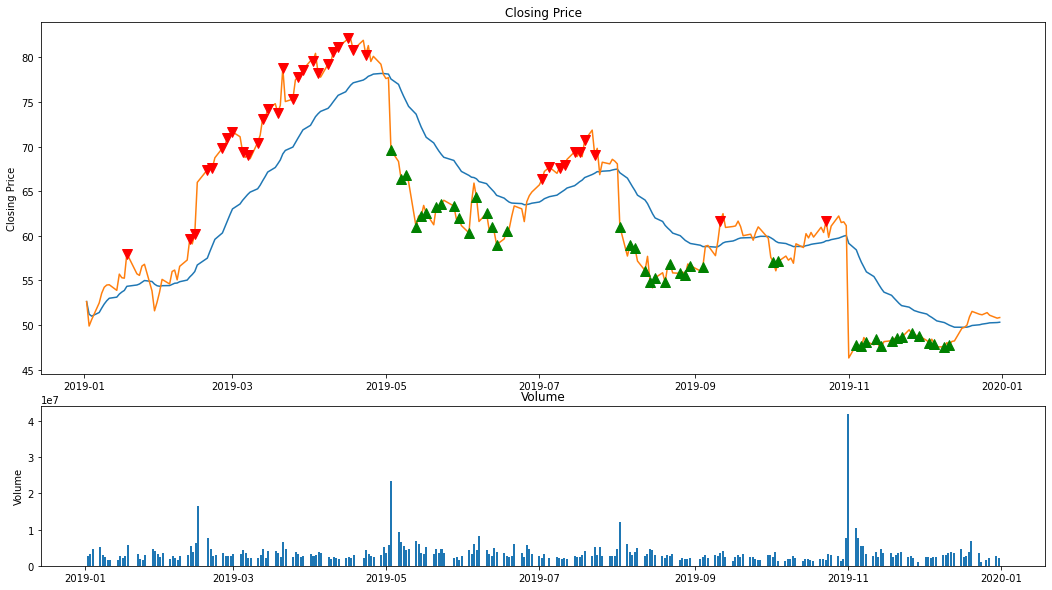

In [6]:
doberplot.order_signal(strategy_name='ema')

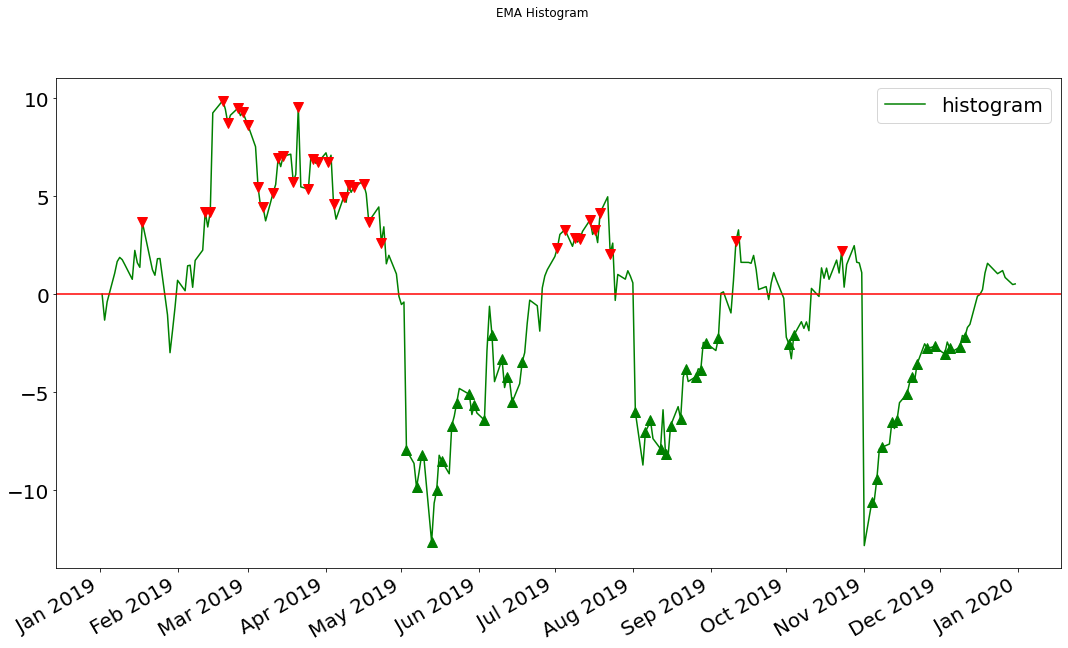

In [7]:
doberplot.histogram(strategy_name='ema')

In [8]:
sim.tradebook.book

{'cash-usd': 8205.663, 'anet': 41}

In [9]:
sim.tradebook.trade_log

[(Timestamp('2019-05-03 00:00:00'), 'buy', 14, 'anet', 69.602),
 (Timestamp('2019-05-07 00:00:00'), 'buy', 15, 'anet', 66.418),
 (Timestamp('2019-07-02 00:00:00'), 'sell', 29, 'anet', 66.325),
 (Timestamp('2019-08-02 00:00:00'), 'buy', 16, 'anet', 61.03),
 (Timestamp('2019-08-06 00:00:00'), 'buy', 16, 'anet', 58.955),
 (Timestamp('2019-09-11 00:00:00'), 'sell', 32, 'anet', 61.702),
 (Timestamp('2019-10-02 00:00:00'), 'buy', 17, 'anet', 57.082),
 (Timestamp('2019-10-04 00:00:00'), 'buy', 17, 'anet', 57.142),
 (Timestamp('2019-10-23 00:00:00'), 'sell', 34, 'anet', 61.652),
 (Timestamp('2019-11-04 00:00:00'), 'buy', 20, 'anet', 47.818),
 (Timestamp('2019-11-06 00:00:00'), 'buy', 21, 'anet', 47.608)]

In [10]:
print(f"{sim.tradebook.calc_book_value('2019-12-31'):0.2f}")

10290.51
